In [50]:
# Data science helpers
from pathlib import Path
import pandas as pd 
import numpy as np

import featuretools as ft


In [94]:
# Read in all data
df_test = pd.read_csv("test.csv",parse_dates = ['date'])
df_sub = pd.read_csv("sample_submission.csv")
df_stores = pd.read_csv("stores.csv")
df_items = pd.read_csv("items.csv")
df_transactions = pd.read_csv("transactions.csv", parse_dates=['date'])
df_oil = pd.read_csv("oil.csv", parse_dates=['date'])
df_holiday = pd.read_csv("holidays_events.csv", parse_dates=['date'])



In [95]:

df_train = pd.read_csv("train.csv",  parse_dates=['date']  )

/var/folders/gq/789ffg0j3_s7scj27n_mdkj40000gn/T/ipykernel_58794/932450269.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv("train.csv",  parse_dates=['date']  )


In [96]:
print(df_train.head())

   id       date  store_nbr  item_nbr  unit_sales onpromotion
0   0 2013-01-01         25    103665         7.0         NaN
1   1 2013-01-01         25    105574         1.0         NaN
2   2 2013-01-01         25    105575         2.0         NaN
3   3 2013-01-01         25    108079         1.0         NaN
4   4 2013-01-01         25    108701         1.0         NaN


In [97]:
train_items=df_train.merge(df_items, left_on='item_nbr', right_on='item_nbr',
                 how='left' )
train_items=train_items.merge(df_holiday,left_on='date', right_on='date',
                 how='left' )
train_items=train_items.merge(df_oil,left_on='date', right_on='date',
                 how='left' )

In [98]:
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [99]:
train_items.head()
train_items=train_items.dropna()

In [100]:
df_transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [101]:
all_info=train_items.merge(df_transactions, left_on=['date','store_nbr'], right_on=['date','store_nbr'],                how='left' )

In [102]:
all_info=all_info.merge(df_stores, left_on=['store_nbr'] ,right_on=['store_nbr'],
           how='left' )

In [103]:
all_info['date']=pd.to_datetime(all_info['date'],format= "%d/%m/%Y")

In [104]:
all_info['month']=all_info['date'].dt.month

In [105]:
all_info['year']=all_info['date'].dt.year

In [106]:
all_info['day']=all_info['date'].dt.weekday

In [107]:
all_info.isnull().sum()

id              0
date            0
store_nbr       0
item_nbr        0
unit_sales      0
onpromotion     0
family          0
class           0
perishable      0
type_x          0
locale          0
locale_name     0
description     0
transferred     0
dcoilwtico      0
transactions    0
city            0
state           0
type_y          0
cluster         0
month           0
year            0
day             0
dtype: int64

In [108]:
dummy_variables = ['store_nbr','item_nbr','onpromotion','type_x','cluster',
                'family','perishable','type_y','onpromotion','class','state','cluster','year', 'transferred','locale','month','day','locale_name']

In [109]:
dummies=pd.get_dummies(all_info[dummy_variables],drop_first=True)

In [110]:
all_info_no_dummies = all_info.drop(dummy_variables, axis=1)

In [111]:
df=all_info_no_dummies.merge(dummies,left_index=True,right_index=True)

In [112]:
df.columns

Index(['id', 'date', 'unit_sales', 'description', 'dcoilwtico', 'transactions',
       'city', 'store_nbr', 'item_nbr', 'cluster', 'perishable', 'class',
       'cluster', 'year', 'month', 'day', 'onpromotion_True', 'type_x_Bridge',
       'type_x_Event', 'type_x_Holiday', 'type_x_Transfer', 'family_BABY CARE',
       'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODU

In [113]:
df = df.loc[:,~df.columns.duplicated()].copy()


In [114]:
df

,id,date,unit_sales,description,dcoilwtico,transactions,city,store_nbr,item_nbr,cluster,...,locale_name_Machala,locale_name_Manta,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas
0,21657651,2014-04-01,1.0,Provincializacion de Cotopaxi,99.69,1847,Quito,1,103520,13,...,False,False,False,False,False,False,False,False,False,False
1,21657652,2014-04-01,3.0,Provincializacion de Cotopaxi,99.69,1847,Quito,1,103665,13,...,False,False,False,False,False,False,False,False,False,False
2,21657653,2014-04-01,1.0,Provincializacion de Cotopaxi,99.69,1847,Quito,1,105574,13,...,False,False,False,False,False,False,False,False,False,False
3,21657654,2014-04-01,11.0,Provincializacion de Cotopaxi,99.69,1847,Quito,1,105575,13,...,False,False,False,False,False,False,False,False,False,False
4,21657655,2014-04-01,4.0,Provincializacion de Cotopaxi,99.69,1847,Quito,1,105577,13,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12560595,125497035,2017-08-15,4.0,Fundacion de Riobamba,47.57,802,El Carmen,54,2089339,3,...,False,False,False,False,False,True,False,False,False,False
12560596,125497036,2017-08-15,1.0,Fundacion de Riobamba,47.57,802,El Carmen,54,2106464,3,...,False,False,False,False,False,True,False,False,False,False
12560597,125497037,2017-08-15,192.0,Fundacion de Riobamba,47.57,802,El Carmen,54,2110456,3,...,False,False,False,False,False,True,False,False,False,False
12560598,125497038,2017-08-15,198.0,Fundacion de Riobamba,47.57,802,El Carmen,54,2113914,3,...,False,False,False,False,False,True,False,False,False,False


In [115]:
df.select_dtypes(include=float)

,unit_sales,dcoilwtico
0,1.0,99.69
1,3.0,99.69
2,1.0,99.69
3,11.0,99.69
4,4.0,99.69
...,...,...
12560595,4.0,47.57
12560596,1.0,47.57
12560597,192.0,47.57
12560598,198.0,47.57


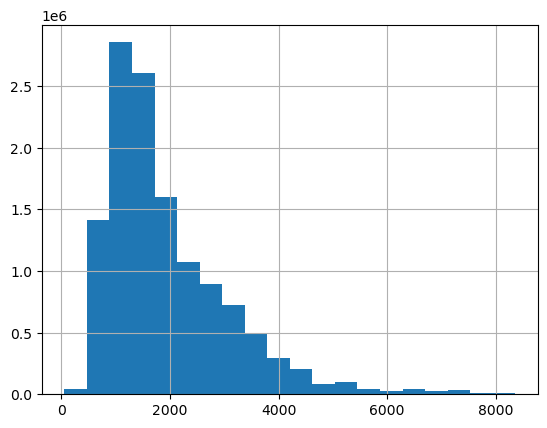

In [116]:
from matplotlib import pyplot as plt
df.transactions.hist(bins=20)
plt.show()

In [117]:

from sklearn.preprocessing import StandardScaler
SS_scaler = StandardScaler()

In [118]:
SS_scaler.fit(df[['transactions']])
df['ss_scaled_transactions']=SS_scaler.transform(df[['transactions']])


<Axes: >

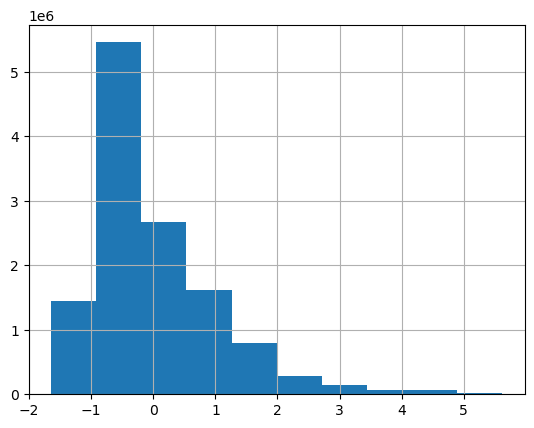

In [119]:
df['ss_scaled_transactions'].hist()

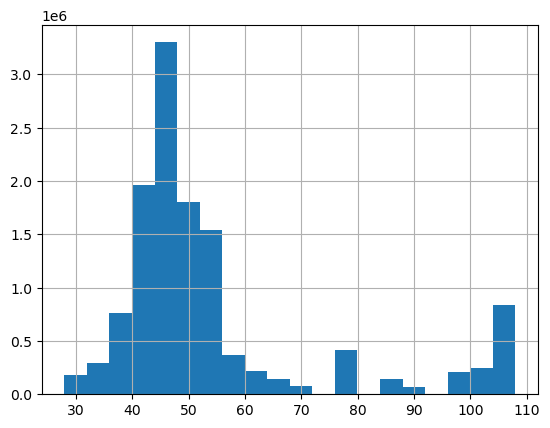

In [120]:
df.dcoilwtico.hist(bins=20)
plt.show()

In [121]:
SS_scaler2 = StandardScaler()
SS_scaler2.fit(df[['dcoilwtico']])
df['ss_scaled_dcoilwtico']=SS_scaler2.transform(df[['dcoilwtico']])


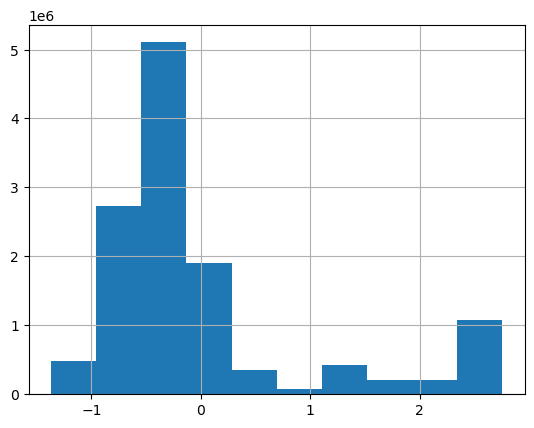

In [122]:
df['ss_scaled_dcoilwtico'].hist()

plt.show()

In [123]:
df=df.drop(columns='description')


In [124]:
df_new=df



Stored 'df_new' (DataFrame)


In [125]:
df_new.head()

,id,date,unit_sales,dcoilwtico,transactions,city,store_nbr,item_nbr,cluster,perishable,...,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas,ss_scaled_transactions,ss_scaled_dcoilwtico
0,21657651,2014-04-01,1.0,99.69,1847,Quito,1,103520,13,0,...,False,False,False,False,False,False,False,False,-0.077457,2.328798
1,21657652,2014-04-01,3.0,99.69,1847,Quito,1,103665,13,1,...,False,False,False,False,False,False,False,False,-0.077457,2.328798
2,21657653,2014-04-01,1.0,99.69,1847,Quito,1,105574,13,0,...,False,False,False,False,False,False,False,False,-0.077457,2.328798
3,21657654,2014-04-01,11.0,99.69,1847,Quito,1,105575,13,0,...,False,False,False,False,False,False,False,False,-0.077457,2.328798
4,21657655,2014-04-01,4.0,99.69,1847,Quito,1,105577,13,0,...,False,False,False,False,False,False,False,False,-0.077457,2.328798


In [130]:
df_new.columns

Index(['id', 'date', 'unit_sales', 'dcoilwtico', 'transactions', 'city',
       'store_nbr', 'item_nbr', 'cluster', 'perishable', 'class', 'year',
       'month', 'day', 'onpromotion_True', 'type_x_Bridge', 'type_x_Event',
       'type_x_Holiday', 'type_x_Transfer', 'family_BABY CARE',
       'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL

In [139]:
df_new=df_new.drop(columns='city')


In [140]:
%store df_new

Stored 'df_new' (DataFrame)


In [141]:
%store -r df_new


In [142]:
corr_matrix=df_new.corr()

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

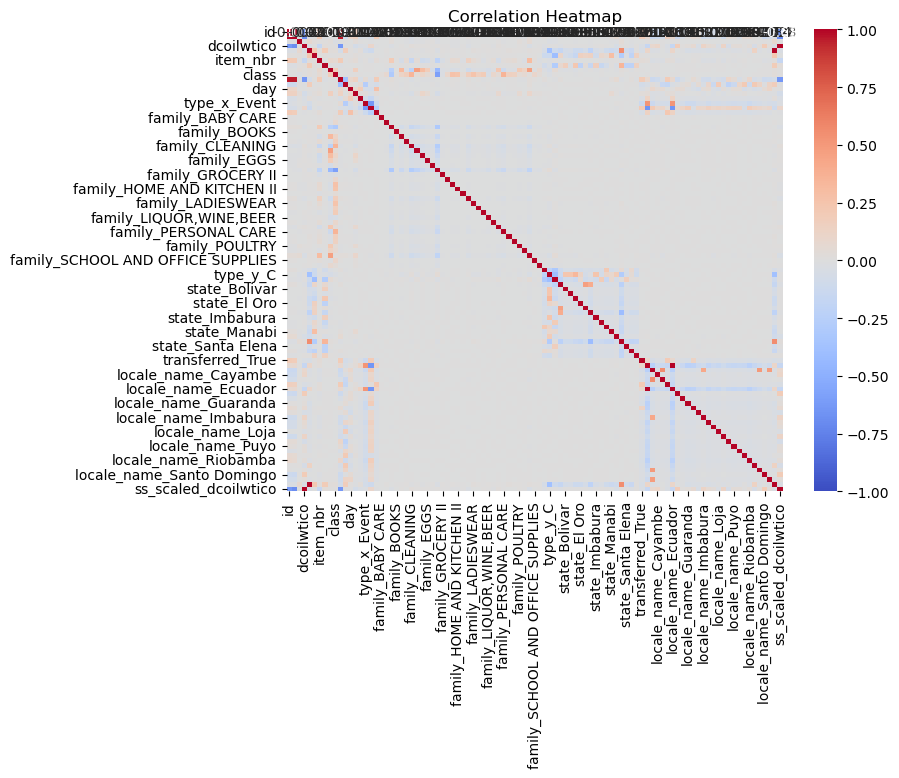

In [144]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()